      ad_spend  store_visits   discount  competitor_price  season_index  \
0  2185.430535    227.135984  11.209225        499.802146      1.229998   
1  4778.214379    263.046047   9.987363        648.048064      0.684512   
2  3793.972738    434.546327   5.284617        537.600068      0.846640   
3  3193.963179    203.001974  18.218000        249.981550      1.163281   
4  1202.083882    441.342358  14.298725        311.348142      0.982089   

         sales  
0  4135.332429  
1  7924.612559  
2  7067.983864  
3  5449.055639  
4  3280.220359  
          ad_spend  store_visits     discount  competitor_price  season_index  \
count  5000.000000   5000.000000  5000.000000       5000.000000   5000.000000   
mean   2735.743959    271.169206    15.041252        504.610820      1.008777   
std    1303.351430    128.527429     8.723095        172.683731      0.288741   
min     500.052356     50.023772     0.004732        200.151473      0.500048   
25%    1597.382630    161.215659     7.415

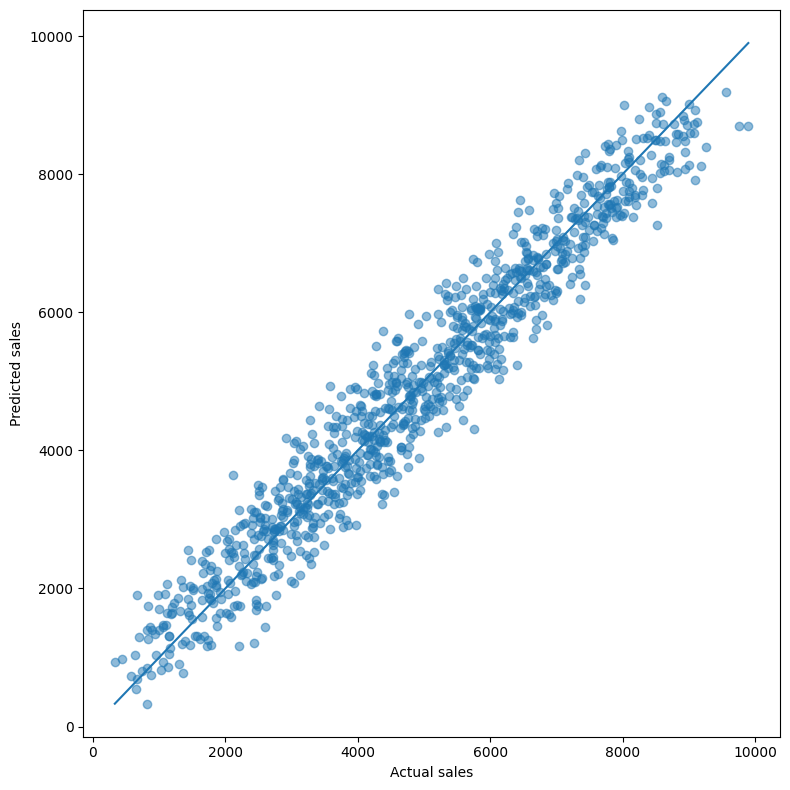

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#load the dataset
df=pd.read_csv("linear_regression_training_dataset_5000.csv")
#first five rows
print(df.head())
#basic statistics
print(df.describe())
#define features(x) and target(y)
feature_cols=["ad_spend","store_visits","discount","competitor_price","season_index"]
x=df[feature_cols]
y=df["sales"]
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#train the linear_regression_model
model=LinearRegression()
model.fit(x_train,y_train)
print("\n ---model coefficient---")
for name,coef in zip(feature_cols,model.coef_):
    print(f"{name}:{coef:4f}")
print(f"Intercept:{model.intercept_:.4f}")
#evaluate the model
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
print("\n---evaluation metrics on test set---")
print(f"R^2 Score:{r2:.4f}")
print(f"MAE:{mae:.2f}")
print(f"MSE:{mse:.2f}")
print(f"RMSE:{rmse:.2f}")

#plot predicted values vs actual values
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")

#plot ideal line
min_val=min(y_test.min(),y_pred.min())
max_val=max(y_test.max(),y_pred.max())
plt.plot([min_val,max_val],[min_val,max_val])
plt.tight_layout()
plt.show()